# ML - HW4 - Q6
# Ali Khoramfar - 810102129

# Import Packages

In [2]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

# Dataset

## Import MNIST

In [3]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist['data'], mnist['target']
y = y.astype(int)

/opt/conda/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [5]:
len(X)

70000

## Split Dataset

In [6]:
np.random.seed(42) 
sample_indices = np.random.choice(X.shape[0], 1000, replace=False)
X_sample, y_sample = X[sample_indices], y[sample_indices]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42, stratify=y_sample)
unique_train, counts_train = np.unique(y_train, return_counts=True)
label_counts_train = dict(zip(unique_train, counts_train))

In [8]:
print(f'Training set size: {X_train.shape[0]}')
print(f'Test set size: {X_test.shape[0]}')
print('Training set label distribution:', label_counts_train)

Training set size: 800
Test set size: 200
Training set label distribution: {0: 76, 1: 83, 2: 76, 3: 95, 4: 70, 5: 72, 6: 78, 7: 82, 8: 81, 9: 87}


## Check 10 Samples in Train Data

In [9]:
dataset_ok = all(count >= 10 for count in counts_train)
print('Dataset is okay:', dataset_ok)
if not dataset_ok:
    print('Not all labels have at least 10 samples in the training set.')

Dataset is okay: True


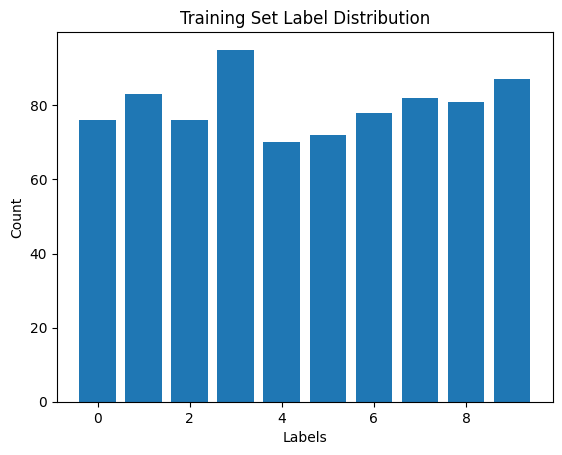

In [10]:
plt.bar(label_counts_train.keys(), label_counts_train.values())
plt.title('Training Set Label Distribution')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

# Function for Display Image

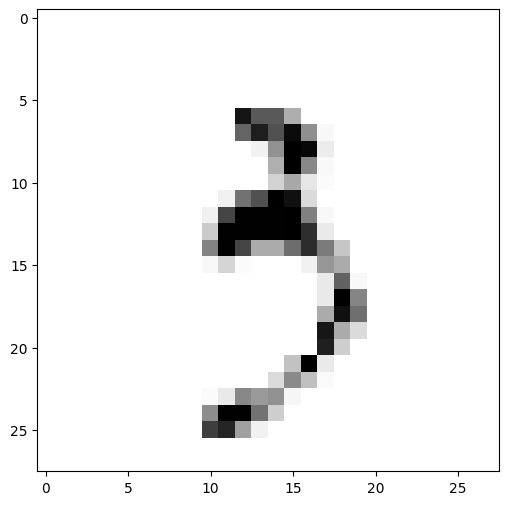

LABEL: 3


In [11]:
def display_sample_image(X, y, index):
    image = X[index].reshape(28, 28)  
    label = y[index]
    plt.figure(figsize=(6, 6))
    plt.imshow(image, cmap='gray_r')  
    plt.xticks(np.arange(0, 28, step=5))
    plt.yticks(np.arange(0, 28, step=5))
    plt.show()
    print('LABEL:', label)

display_sample_image(X_train, y_train, 42) 

## Linear

In [12]:
param_grid_linear = {
    'C': [0.1, 1, 10, 100]
}

svc_linear = SVC(kernel='linear')
grid_search_linear = GridSearchCV(svc_linear, param_grid_linear, cv=5, scoring='accuracy')
grid_search_linear.fit(X_train, y_train)
best_params_linear = grid_search_linear.best_params_
best_score_linear = grid_search_linear.best_score_

print("Best parameters for linear kernel:", best_params_linear)
print("Best score for linear kernel:", best_score_linear)

Best parameters for linear kernel: {'C': 0.1}
Best score for linear kernel: 0.86875


## Polynomial Degree 2

In [14]:
param_grid_poly = {
    'C': [0.1, 1, 10, 100],
    'degree': [2],
    'gamma': [0.001, 0.01, 0.1, 1, 'scale', 'auto']
}

svc_poly = SVC(kernel='poly')
grid_search_poly = GridSearchCV(svc_poly, param_grid_poly, cv=5, scoring='accuracy')
grid_search_poly.fit(X_train, y_train)
best_params_poly = grid_search_poly.best_params_
best_score_poly = grid_search_poly.best_score_

print("Best parameters for polynomial kernel:", best_params_poly)
print("Best score for polynomial kernel:", best_score_poly)

Best parameters for polynomial kernel: {'C': 0.1, 'degree': 2, 'gamma': 0.001}
Best score for polynomial kernel: 0.8825


## RBF

In [16]:
param_grid_rbf = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 'scale', 'auto']
}
svc_rbf = SVC(kernel='rbf')
grid_search_rbf = GridSearchCV(svc_rbf, param_grid_rbf, cv=5, scoring='accuracy')
grid_search_rbf.fit(X_train, y_train)
best_params_rbf = grid_search_rbf.best_params_
best_score_rbf = grid_search_rbf.best_score_

print("Best parameters for RBF kernel:", best_params_rbf)
print("Best score for RBF kernel:", best_score_rbf)

Best parameters for RBF kernel: {'C': 10, 'gamma': 'scale'}
Best score for RBF kernel: 0.9049999999999999


# Train Based on RBF Kernel

In [62]:
best_svc_rbf = SVC(kernel='rbf', C=best_params_rbf['C'], gamma=best_params_rbf['gamma'])
best_svc_rbf.fit(X_train, y_train)

y_train_pred = best_svc_rbf.predict(X_train)
y_test_pred = best_svc_rbf.predict(X_test)

In [65]:
train_accuracy = accuracy_score(y_train, y_train_pred)
train_error = 1 - train_accuracy
print(f'Training accuracy: {train_accuracy:.4f}')
print(f'Training error: {train_error:.4f}')

Training accuracy: 1.0000
Training error: 0.0000


In [66]:
test_accuracy = accuracy_score(y_test, y_test_pred)
test_error = 1 - test_accuracy
print(f'Test accuracy: {test_accuracy:.4f}')
print(f'Test error: {test_error:.4f}')

Test accuracy: 0.9350
Test error: 0.0650


In [67]:
print("\nClassification report for the test set:")
print(classification_report(y_test, y_test_pred))


Classification report for the test set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       0.94      0.89      0.92        19
           3       0.88      0.96      0.92        24
           4       0.85      0.94      0.89        18
           5       1.00      0.94      0.97        18
           6       0.90      1.00      0.95        19
           7       0.89      0.81      0.85        21
           8       0.94      0.85      0.89        20
           9       0.95      0.95      0.95        21

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.93       200



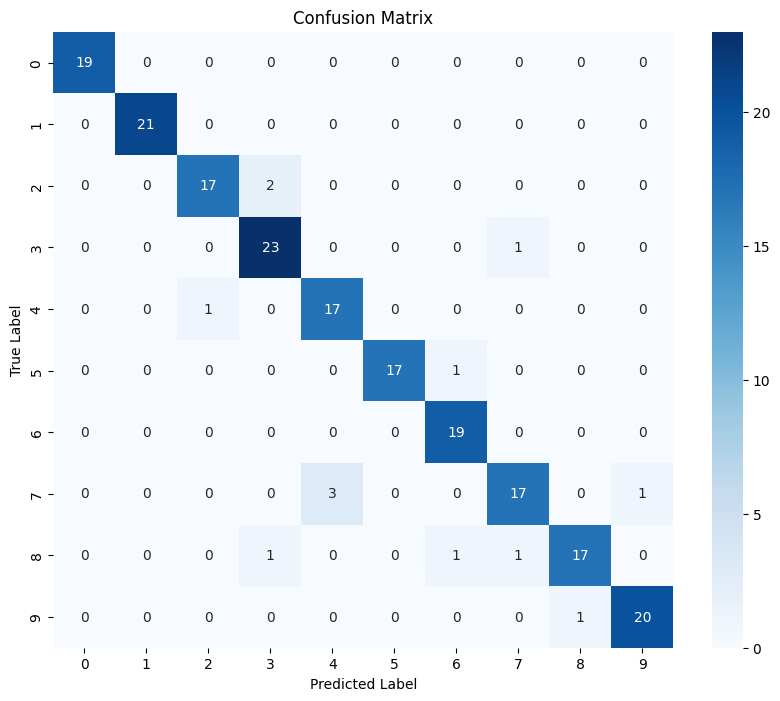

In [71]:
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Logistic Regression

In [73]:
logistic_regression = LogisticRegression(max_iter=10000, random_state=42)
logistic_regression.fit(X_train, y_train)

y_test_pred_log_reg = logistic_regression.predict(X_test)

In [74]:
test_accuracy_log_reg = accuracy_score(y_test, y_test_pred_log_reg)
test_error_log_reg = 1 - test_accuracy_log_reg
print(f'Logistic Regression Test accuracy: {test_accuracy_log_reg:.4f}')
print(f'Logistic Regression Test error: {test_error_log_reg:.4f}')

Logistic Regression Test accuracy: 0.8450
Logistic Regression Test error: 0.1550


In [75]:
print("\nClassification report for the logistic regression model:")
print(classification_report(y_test, y_test_pred_log_reg))


Classification report for the logistic regression model:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        19
           1       0.90      0.86      0.88        21
           2       1.00      0.68      0.81        19
           3       0.78      0.88      0.82        24
           4       0.75      0.67      0.71        18
           5       0.88      0.83      0.86        18
           6       0.79      1.00      0.88        19
           7       0.82      0.86      0.84        21
           8       0.89      0.80      0.84        20
           9       0.79      0.90      0.84        21

    accuracy                           0.84       200
   macro avg       0.85      0.84      0.84       200
weighted avg       0.85      0.84      0.84       200



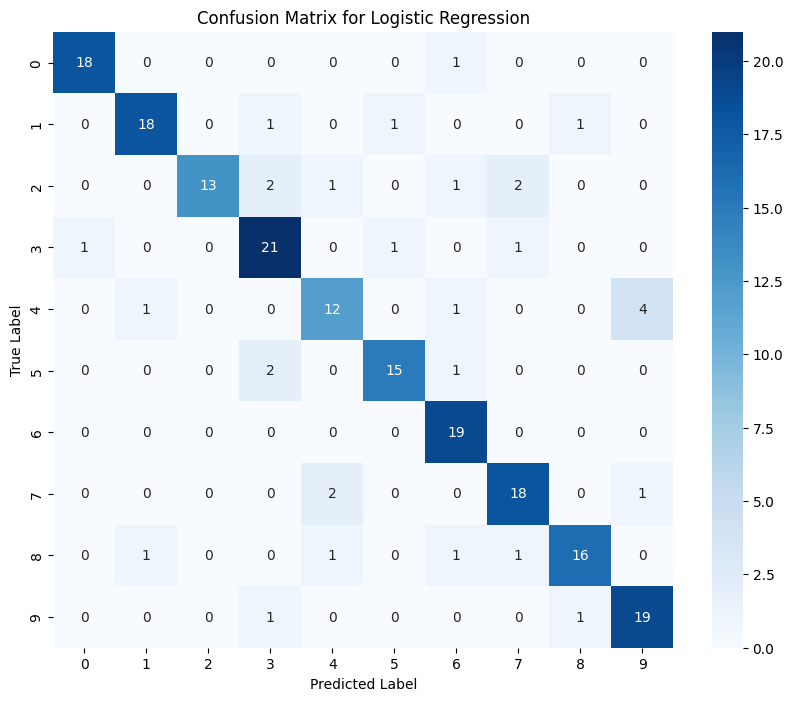

In [76]:
cm_log_reg = confusion_matrix(y_test, y_test_pred_log_reg)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

## Compare 

In [77]:
print(f'SVM Test error: {test_error:.4f}')
print(f'Logistic Regression Test error: {test_error_log_reg:.4f}')

SVM Test error: 0.0650
Logistic Regression Test error: 0.1550


## Logistic Regression misclassified - SVM correctly classified.

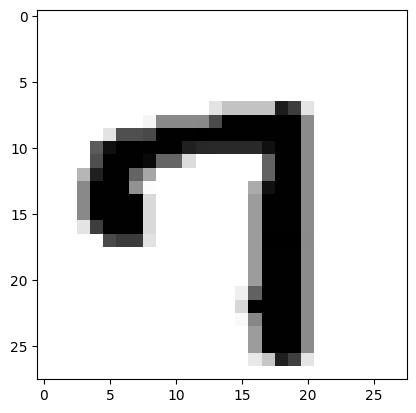

True Label: 7
Logistic Regression Predicted: 9
SVM Predicted: 7


In [80]:
misclassified_indices = np.where((y_test_pred_log_reg != y_test) & (y_test_pred == y_test))[0]

if len(misclassified_indices) > 0:
    index = misclassified_indices[0]
    
    image = X_test[index].reshape(28, 28)
    true_label = y_test[index]
    log_reg_pred_label = y_test_pred_log_reg[index]
    svm_pred_label = y_test_pred[index]

    plt.imshow(image, cmap='gray_r')
    plt.xticks(np.arange(0, 28, step=5))
    plt.yticks(np.arange(0, 28, step=5))
    plt.show()
    
    print(f'True Label: {true_label}')
    print(f'Logistic Regression Predicted: {log_reg_pred_label}')
    print(f'SVM Predicted: {svm_pred_label}')
else:
    print("No sample found ")